# 공부시간에 따른 점수 예측하기
- 목표 : 공부시간으로 점수 예측
- 데이터셋 : 임의의 생성 
- 피쳐 / 속성 : 공부시간
- 타겟 / 라벨 : 점수
- 학습 방법 : 지도학습 -> 회귀
- 알고리즘 : 선형회귀
    - 조건 : 데이터의 분포가 선형 분포여야 함 ! 

## [1] 데이터 준비

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 1개의 데이터셋
jumsu = range(7,100,7)
len(jumsu), jumsu[-1]

(14, 98)

In [4]:
hour = range(1,29,2)
len(hour)

14

In [5]:
# list -> DataFrame
hour_df = pd.DataFrame(hour, columns = ['hour'])
hour_df.head()

,hour
0,1
1,3
2,5
3,7
4,9


In [6]:
jumsu_sr = pd.Series(jumsu)
jumsu_sr.head()

0     7
1    14
2    21
3    28
4    35
dtype: int64

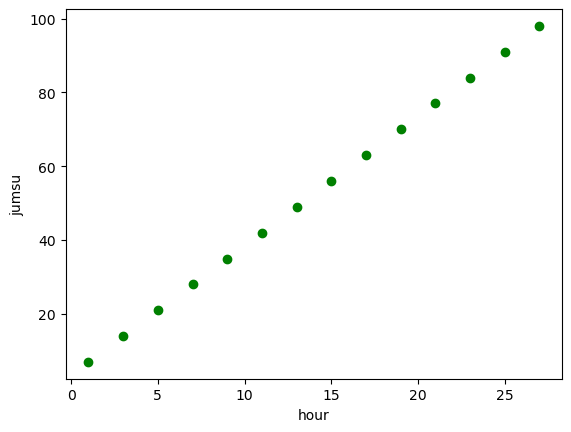

In [7]:
# 현재 데이터의 분포 확인 

plt.plot(hour_df, jumsu_sr, 'go')
plt.xlabel('hour')
plt.ylabel('jumsu')
plt.show()

선형 관계에 있으므로 선형모델 사용

## [2] 모델 생성 및 학습 진행 

In [8]:
# 모듈 로딩 
from sklearn.linear_model import LinearRegression

In [9]:
# 학습 모델 인스턴스 생성 
model = LinearRegression()

In [10]:
# 학습 진행 -> 최대한 많은 데이터를 만족하는 직선의 기울기와 절편 찾기 
model.fit(hour_df, jumsu_sr)

# x : 시간, y : 점수 

LinearRegression()

In [12]:
# 학습 후 모델 파라미터
print(f'기울기 : {model.coef_} 절편 : {model.intercept_}')

기울기 : [3.5] 절편 : 3.500000000000014


-> y = 3.5x + 3.500000000000014

In [25]:
type(model.coef_)

numpy.ndarray

In [20]:
# 예측값
pre_jumsu = model.coef_[0] * hour_df + model.intercept_  # model.coef_[0] 로 해야 값이 나옴 
pre_jumsu

,hour
0,7.0
1,14.0
2,21.0
3,28.0
4,35.0
5,42.0
6,49.0
7,56.0
8,63.0
9,70.0


In [18]:
pre_jumsu.shape

(14, 1)

In [19]:
jumsu_sr.shape

(14,)

In [27]:
jumsu_sr.to_frame()

,0
0,7
1,14
2,21
3,28
4,35
5,42
6,49
7,56
8,63
9,70


In [30]:
pre_jumsu=pre_jumsu.values.reshape(-1)
pre_jumsu

array([ 7., 14., 21., 28., 35., 42., 49., 56., 63., 70., 77., 84., 91.,
       98.])

In [31]:
# 실제 점수와 예측 점수 차이 확인 
# pre_jumsu : ndarray

real_jumsu = jumsu_sr.to_numpy()
real_jumsu - pre_jumsu

array([-1.33226763e-14, -1.06581410e-14, -1.06581410e-14, -7.10542736e-15,
       -7.10542736e-15, -7.10542736e-15,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.42108547e-14,  1.42108547e-14])

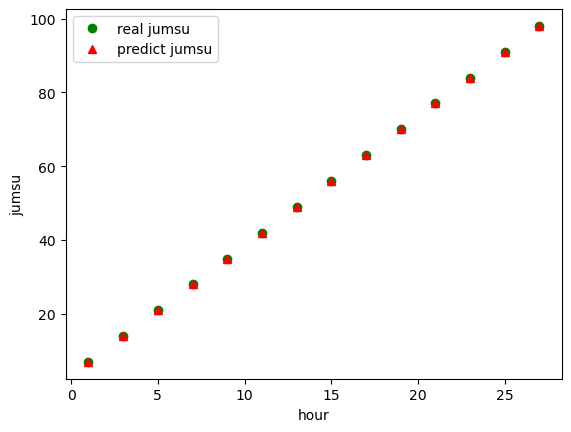

In [33]:
# 현재 데이터의 분포 확인 

plt.plot(hour_df, jumsu_sr, 'go', label = 'real jumsu')
plt.plot(hour_df, pre_jumsu, 'r^', label = 'predict jumsu')

plt.xlabel('hour')
plt.ylabel('jumsu')
plt.legend()

plt.show()

# [3] 모델 성능 평가

In [34]:
model.score(hour_df, jumsu_sr) 

1.0

회귀의 score : 얼마나 근사적으로 맞췄는지

분류의 score : 몇 개 맞췄는지

In [36]:
# 오차 구하기
# 즉, 손실/ 비용 함수 확인

from sklearn.metrics import mean_absolute_error # 절대값  
from sklearn.metrics import mean_squared_error # 제곱 - (정답값, 예측값 제공)
from sklearn.metrics import r2_score # 결정계수 
# from sklearn.metrics import root_mean_squared_error : 버전 1.4 이상


In [37]:
import sklearn
sklearn.__version__

'1.3.0'

In [39]:
pre_y = model.predict(hour_df)
pre_y

array([ 7., 14., 21., 28., 35., 42., 49., 56., 63., 70., 77., 84., 91.,
       98.])

In [41]:
mse = mean_squared_error(jumsu_sr, pre_y)
mse

6.857455154671224e-29

In [48]:
rmse = mean_squared_error(jumsu_sr, pre_y, squared = False) # 루트로 제공 
rmse

8.280975277508818e-15

In [45]:
mae = mean_absolute_error(jumsu_sr, pre_y)
mae

6.026924990822278e-15

In [46]:
r2 = r2_score(jumsu_sr, pre_y)
r2

1.0

In [49]:
# 손실/비용 함수 값은 0에 가까울 수록
# 결정계수 값은 1에 가까울 수록 성능 좋은 모델 

print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'mae : {mae}')
print(f'r2 : {r2}')

mse : 6.857455154671224e-29
rmse : 8.280975277508818e-15
mae : 6.026924990822278e-15
r2 : 1.0


회귀분석에서 score와 r2_score의 결과값은 동일 